# Numbers and charts for "_Shakespeare and Company Project_  Datasets"

## setup

In [1]:
import pandas as pd

# load data as csv from local copies of 1.2 version
csv_paths = {
    'members': '../data/SCoData_members_v1.2_2022_01.csv',
    'books':  '../data/SCoData_books_v1.2_2022_01.csv',
    'events': '../data/SCoData_events_v1.2_2022_01.csv',
}

# load members, books, events as csv
members_df = pd.read_csv(csv_paths['members'])
books_df = pd.read_csv(csv_paths['books'])
events_df = pd.read_csv(csv_paths['events'])


C:\Users\dittmann\AppData\Local\Temp\ipykernel_4424\3365563468.py:13: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  events_df = pd.read_csv(csv_paths['events'])



# members


## overview - demographics


In [2]:
total_members = len(members_df)
print('%d members' % len(members_df))

5235 members


In [3]:
def percent_known(df, field):
  total = len(df)
  with_field = len(members_df[members_df[field].notnull()])
  print('%d with %s : %.00f%%' % (with_field, field, (with_field/total)*100))
  return with_field

In [4]:
total_known = {}
for field in ['title', 'gender', 'birth_year', 'death_year', 'nationalities', 'viaf_url', 'wikipedia_url']:
    total_known[field] = percent_known(members_df, field)

print(total_known)

3673 with title : 70%
4039 with gender : 77%
561 with birth_year : 11%
544 with death_year : 10%
581 with nationalities : 11%
520 with viaf_url : 10%
358 with wikipedia_url : 7%
{'title': 3673, 'gender': 4039, 'birth_year': 561, 'death_year': 544, 'nationalities': 581, 'viaf_url': 520, 'wikipedia_url': 358}


In [5]:
known = pd.DataFrame({'total': total_known})
known['percent'] = (known['total'] / len(members_df))*100
known = known.sort_values(by=['total'], ascending=False)
known.percent = known.percent.round(2)
known

,total,percent
gender,4039,77.15
title,3673,70.16
nationalities,581,11.10
birth_year,561,10.72
death_year,544,10.39
viaf_url,520,9.93
wikipedia_url,358,6.84


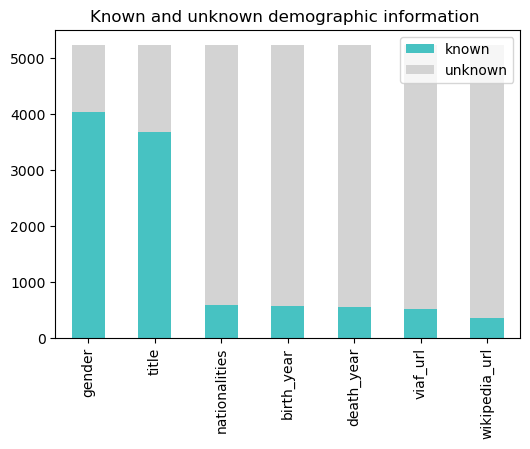

In [6]:
import matplotlib
total_members = len(members_df.index)
known_unknown = pd.DataFrame()
known_unknown['known'] = known['total']

known_unknown['unknown'] = known.total.apply(lambda x: total_members - x)

known_unknown.plot(kind='bar', title='Known and unknown demographic information ', stacked=True, color=['#47C2C2', 'lightgray'], figsize=(6,4))
matplotlib.pyplot.savefig('known_unknown_demographics.svg')

In [7]:
unknown = members_df
for field in ['title', 'gender', 'birth_year', 'death_year', 'nationalities', 'viaf_url', 'wikipedia_url']:
  unknown = unknown[unknown[field].isnull()]

print(f'{len(unknown):,} members with no demographic info')
unknown

1,183 members with no demographic info


,uri,name,sort_name,title,gender,is_organization,has_card,birth_year,death_year,membership_years,viaf_url,wikipedia_url,nationalities,addresses,postal_codes,arrondissements,coordinates,notes,updated
2,https://shakespeareandco.princeton.edu/members...,Abdul,Abdul,NaN,NaN,False,False,NaN,NaN,1941,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-12-22T01:57:37+00:00
4,https://shakespeareandco.princeton.edu/members...,Abelin,Abelin,NaN,NaN,False,False,NaN,NaN,1933,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-12-22T01:57:48+00:00
8,https://shakespeareandco.princeton.edu/members...,L. C. Abrahams,"Abrahams, L. C.",NaN,NaN,False,False,NaN,NaN,1937,NaN,NaN,NaN,"Hôtel du Luxembourg, 12 rue Royer-Collard, Paris",75005,5,"48.84586, 2.34182","The Shakespeare and Company <a href=""https://s...",2021-08-15T00:40:29+00:00
11,https://shakespeareandco.princeton.edu/members...,Accursi,Accursi,NaN,NaN,False,False,NaN,NaN,1941,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-12-22T01:58:25+00:00
12,https://shakespeareandco.princeton.edu/members...,Achenbach,Achenbach,NaN,NaN,False,False,NaN,NaN,1939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-10-22T15:22:26.589958+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5210,https://shakespeareandco.princeton.edu/members...,Young,Young,NaN,NaN,False,False,NaN,NaN,1929;1930,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-11-19T14:47:39+00:00
5211,https://shakespeareandco.princeton.edu/members...,Young,Young,NaN,NaN,False,False,NaN,NaN,1939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-11-19T14:47:39+00:00
5212,https://shakespeareandco.princeton.edu/members...,Young,Young,NaN,NaN,False,False,NaN,NaN,1936,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-11-19T14:47:39+00:00
5222,https://shakespeareandco.princeton.edu/members...,Zakorska,Zakorska,NaN,NaN,False,False,NaN,NaN,1927,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-11-19T14:47:39+00:00


## membership years

In [8]:
 no_membership_years = members_df[members_df['membership_years'].isnull()]
print('%d members with no membership years' % len(no_membership_years))
no_membership_years


58 members with no membership years


,uri,name,sort_name,title,gender,is_organization,has_card,birth_year,death_year,membership_years,viaf_url,wikipedia_url,nationalities,addresses,postal_codes,arrondissements,coordinates,notes,updated
101,https://shakespeareandco.princeton.edu/members...,Louis Aragon,"Aragon, Louis",NaN,Male,False,True,1897.0,1982.0,NaN,http://viaf.org/viaf/8178518,http://en.wikipedia.org/wiki/Louis_Aragon,France,"12 rue Saint-Pierre, Neuilly-sur-Seine",92200,NaN,"48.88241, 2.27120",NaN,2020-12-28T15:46:16+00:00
136,https://shakespeareandco.princeton.edu/members...,Louis Atlas,"Atlas, Louis",NaN,Male,False,False,NaN,NaN,NaN,NaN,NaN,NaN,"16 rue Jacques Callot, Paris",75006,6,"48.85536, 2.33694",According to the Shakespeare and Company [addr...,2021-09-23T12:11:31.262776+00:00
152,https://shakespeareandco.princeton.edu/members...,Jacob Auslander,"Auslander, Jacob",Mr.,Male,False,False,NaN,NaN,NaN,NaN,NaN,NaN,"244 boulevard Raspail, Paris",75014,14,"48.83832, 2.33068","The Shakespeare and Company <a href=""https://s...",2021-10-28T17:47:21.441317+00:00
210,https://shakespeareandco.princeton.edu/members...,Mme Baquis,"Baquis, Mme",Mme,Female,False,False,NaN,NaN,NaN,NaN,NaN,NaN,"Hôtel l'Aiglon, 232 boulevard Raspail, Paris",75014,14,"48.83966, 2.33008","The Shakespeare and Company <a href=""https://s...",2021-08-15T01:50:35+00:00
215,https://shakespeareandco.princeton.edu/members...,Jean Barbier,"Barbier, Jean",M.,Male,False,False,NaN,NaN,NaN,NaN,NaN,NaN,"École Polytechnique, 5 rue Descartes, Paris",75005,5,"48.84716, 2.34874","The Shakespeare and Company <a href=""https://s...",2021-11-22T13:16:42.333372+00:00
371,https://shakespeareandco.princeton.edu/members...,Miss Best,"Best, Miss",Miss,Female,False,False,NaN,NaN,NaN,NaN,NaN,NaN,"125 avenue des Champs-Élysées, Paris",75008,8,"48.87251, 2.29788","The Shakespeare and Company <a href=""https://s...",2021-10-28T13:12:01.090477+00:00
392,https://shakespeareandco.princeton.edu/members...,Hans Bieler,"Bieler, Hans",Dr.,Male,False,False,NaN,NaN,NaN,NaN,NaN,NaN,"Crystal Hotel Paris, 24 rue Saint-Benoît, Paris",75006,6,"48.85445, 2.33271","The Shakespeare and Company <a href=""https://s...",2021-08-02T01:31:28+00:00
501,https://shakespeareandco.princeton.edu/members...,Mlle Boscq,"Boscq, Mlle",Mlle,Female,False,False,NaN,NaN,NaN,NaN,NaN,NaN,"Lycée de jeunes filles, 6 rue Bourg les Bourgs...",29000,NaN,"47.99391, -4.11150","The Shakespeare and Company <a href=""https://s...",2021-07-27T00:13:44+00:00
604,https://shakespeareandco.princeton.edu/members...,Catherine Brody,"Brody, Catherine",Miss,Female,False,False,NaN,NaN,NaN,NaN,NaN,NaN,"9 rue de la Grande Chaumière, Paris",75006,6,"48.84226, 2.33080","The Shakespeare and Company <a href=""https://s...",2021-07-28T18:06:55+00:00
632,https://shakespeareandco.princeton.edu/members...,Colette Brull-Ulmann / Mlle Colette Brull,"Brull-Ulmann, Colette",Mlle,Female,False,True,1920.0,NaN,NaN,http://viaf.org/viaf/166152138619610981032/,https://fr.wikipedia.org/wiki/Colette_Brull-Ul...,France,"1 avenue du Général Maistre, Paris",75014,14,"48.82538, 2.31392",NaN,2021-02-28T13:54:56+00:00


## members from 1.1 no longer included in 1.2

In [9]:
# load 1.0 data from published version
# events_v1_df = pd.read_csv('https://dataspace.princeton.edu/bitstream/88435/dsp013484zk85z/2/SCoData_events_v1_2020-07.csv')
# books_v1_df = pd.read_csv('https://dataspace.princeton.edu/jspui/bitstream/88435/dsp016w924f76z/6/SCoData_books_v1_2020-07.csv')
# members_v1_df = pd.read_csv('https://dataspace.princeton.edu/bitstream/88435/dsp0105741v63x/7/SCoData_members_v1_2020-07.csv')

In [10]:
removed_members = members_v1_df[~members_v1_df.uri.isin(members_df.uri)]
removed_members

NameError: name 'members_v1_df' is not defined

## addresses added in 1.2

In [ ]:
members_df['address_count'] = members_df.addresses.apply(lambda x: len(x.split(';')) if(pd.notnull(x)) else 0)
members_v1_df['address_count'] = members_v1_df.addresses.apply(lambda x: len(x.split(';')) if(pd.notnull(x)) else 0)

print('%s members with addresses' % members_df[members_df.addresses.notna()].shape[0])
print('%s total addresses' % members_df.address_count.sum())

print('\n%s members with addresses (v1 dataset)' % members_v1_df[members_v1_df.addresses.notna()].shape[0])
print('%s total addresses (v1)' % members_v1_df.address_count.sum())

print('\naddresses added: %s' % (members_df.address_count.sum() - members_v1_df.address_count.sum(), ))

2750 members with addresses
3227 total addresses

1787 members with addresses (v1 dataset)
2172 total addresses (v1)

addresses added: 1055


## members with active subscriptions by month


In [ ]:
# recalculate active members using month range and unique member URIs
from dateutil.relativedelta import relativedelta

# regenerate month range; create a dataframe instead of a list
month_range = pd.DataFrame(data={'month_start': pd.date_range('1919-11-01','1942-09-01', freq='MS')})
one_month = relativedelta(months=1)
# use relative delta to calculate one month — this is the start of the next month and should be considered the outer bound of the range
month_range['month_end'] = month_range.month_start.apply(lambda x: x + one_month)
month_range

,month_start,month_end
0,1919-11-01,1919-12-01
1,1919-12-01,1920-01-01
2,1920-01-01,1920-02-01
3,1920-02-01,1920-03-01
4,1920-03-01,1920-04-01
...,...,...
270,1942-05-01,1942-06-01
271,1942-06-01,1942-07-01
272,1942-07-01,1942-08-01
273,1942-08-01,1942-09-01


In [ ]:
subscription_events = events_df[events_df['event_type'].isin(['Subscription', 'Renewal', 'Supplement'])].copy()
subscription_events['start_date_dt'] = pd.to_datetime(subscription_events.start_date, errors='coerce')
subscription_events['end_date_dt'] = pd.to_datetime(subscription_events.end_date, errors='coerce')


In [ ]:
def active_membership(d, df_t):
    # find all subscription events that overlap with the month
    # any overlap = subscription starts before month ends AND subscription ends after month starts
    active_subs = df_t[(df_t.start_date_dt <= d.month_end) & (df_t.end_date_dt >= d.month_start)]
    # return number of unique member ids
    return len(active_subs.member_uris.unique())

# generate a new frame with our month ranges and calculate
# - total number of active members/accounts for each month
active_member_df = month_range.copy()
active_member_df['total'] = active_member_df.apply(active_membership, axis=1, args=(subscription_events,))
#active_member_df['with_card'] = active_member_df.apply(borrowers_active_membership, axis=1, args=(subscription_events_cardinfo,))

active_member_df

NameError: name 'month_range' is not defined

In [ ]:
active_member_df.shape(7)

NameError: name 'active_member_df' is not defined

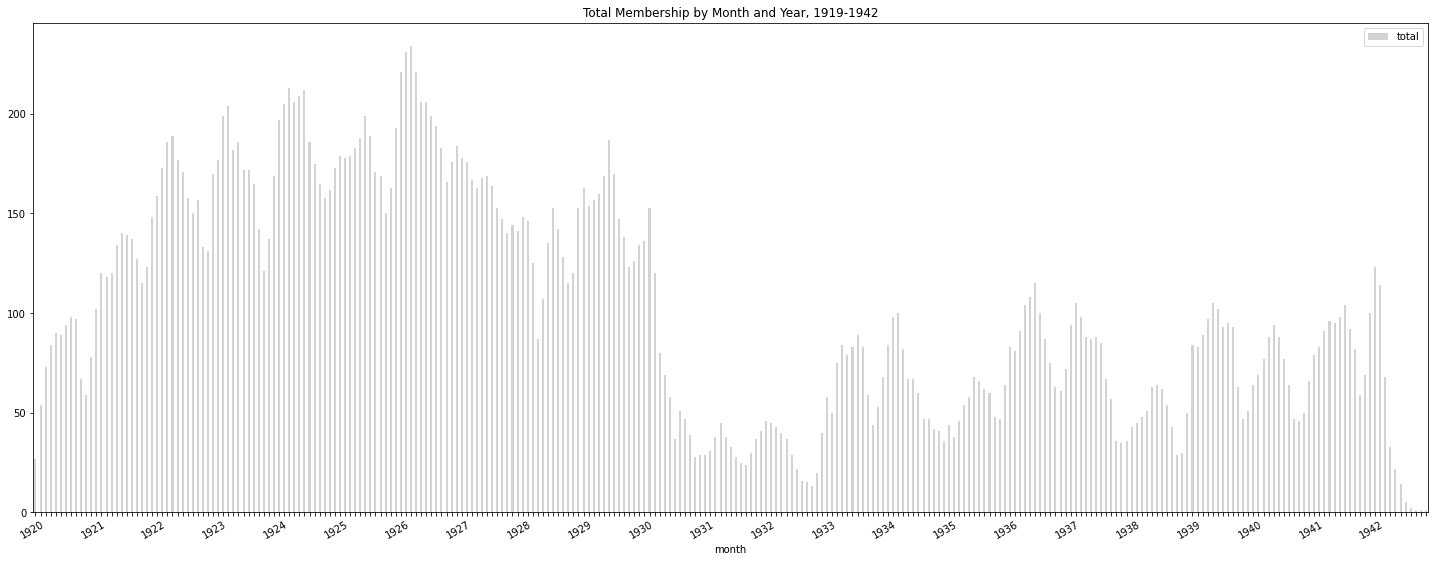

In [ ]:
from matplotlib.dates import DateFormatter
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt

active_member_df['month'] = pd.to_datetime(active_member_df.month_start)
ax = active_member_df.plot.bar(x='month', y='total', figsize=(25,10), title='Total Membership by Month and Year, 1919-1942', color="lightgray", width=0.4, linewidth=0)

# Make most of the ticklabels empty so the labels don't get too crowded
ticklabels = active_member_df.month.apply(lambda x: x.strftime('%Y') if x.month == 1 else '')
gridline = active_member_df.month.apply(lambda x: 1 if x.month == 1 else 0)


ax.xaxis.set_major_formatter(ticker.FixedFormatter(ticklabels))
plt.gcf().autofmt_xdate()
plt.grid(axis='x', color='0.95', data=(gridline, 0))

plt.show()
ax.figure.savefig('membership_month_year.png')

# Define the date format
# date_form = DateFormatter("%Y")
# plot.xaxis.set_major_formatter(date_form)
# plot.show()


In [ ]:
active_member_df.sort_values('total', ascending=False).head(10)

,month_start,month_end,total,month
74,1926-01-01,1926-02-01,234,1926-01-01
73,1925-12-01,1926-01-01,231,1925-12-01
75,1926-02-01,1926-03-01,221,1926-02-01
72,1925-11-01,1925-12-01,221,1925-11-01
50,1924-01-01,1924-02-01,213,1924-01-01
53,1924-04-01,1924-05-01,212,1924-04-01
52,1924-03-01,1924-04-01,209,1924-03-01
76,1926-03-01,1926-04-01,206,1926-03-01
77,1926-04-01,1926-05-01,206,1926-04-01
51,1924-02-01,1924-03-01,206,1924-02-01


# books


## totals by format

<AxesSubplot:title={'center':'Book totals by format'}, ylabel='format'>

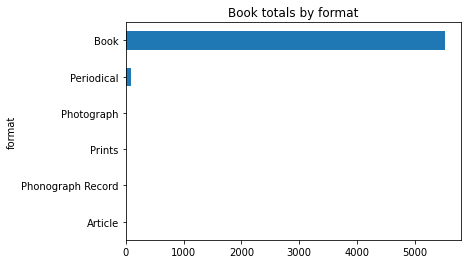

In [ ]:
books_df.value_counts("format").sort_values().plot(kind='barh', title='Book totals by format')

## uncertain

In [ ]:
uncertain_books = books_df[books_df.uncertain]
total_books = len(books_df)
print('%d total books' % total_books)
total_uncertain = len(uncertain_books)
print('%d books marked uncertain : %.00f%%' % (total_uncertain, (total_uncertain/total_books)*100))

6020 total books
475 books marked uncertain : 8%


## unknown circulation years

In [ ]:
 no_circ_years = books_df[books_df['circulation_years'].isnull()]
print('%d books with no circulation years' % len(no_circ_years))
print('%d max event count / %d min event count' % (max(no_circ_years.event_count), min(no_circ_years.event_count)))
no_circ_years.head()

32 books with no circulation years
1 max event count / 0 min event count


,uri,title,author,editor,translator,introduction,illustrator,photographer,year,format,uncertain,ebook_url,volumes_issues,notes,event_count,borrow_count,purchase_count,circulation_years,updated
185,https://shakespeareandco.princeton.edu/books/b...,The Professor,"Brontë, Charlotte",NaN,NaN,NaN,NaN,NaN,1857.0,Book,False,https://archive.org/details/in.ernet.dli.2015....,NaN,NaN,1,1,0,NaN,2020-05-25T18:33:58+00:00
225,https://shakespeareandco.princeton.edu/books/w...,The Gipsies,"Woodcock, Henry",NaN,NaN,NaN,NaN,NaN,1865.0,Book,False,NaN,NaN,NaN,0,0,0,NaN,2020-04-30T19:40:20+00:00
335,https://shakespeareandco.princeton.edu/books/h...,Dr. Breen's Practice,"Howells, William Dean",NaN,NaN,NaN,NaN,NaN,1881.0,Book,False,https://archive.org/details/cu31924022258697,NaN,NaN,1,1,0,NaN,2021-05-25T01:07:51+00:00
559,https://shakespeareandco.princeton.edu/books/f...,Boston Cooking-School Cook Book,"Farmer, Fannie Merritt",NaN,NaN,NaN,NaN,NaN,1896.0,Book,False,https://archive.org/details/bostoncookingsc00c...,NaN,NaN,1,1,0,NaN,2020-07-17T01:17:29+00:00
611,https://shakespeareandco.princeton.edu/books/a...,Elizabeth and Her German Garden,"Arnim, Elizabeth von",NaN,NaN,NaN,NaN,NaN,1898.0,Book,False,https://archive.org/details/elizabethandher02e...,NaN,NaN,1,0,0,NaN,2020-04-30T19:40:20+00:00


### check books with unknown circulation years

In [ ]:
# check books with unknown circulation years a different way
# get year for start / end date
events_df['start_year'] = events_df.start_date.apply(lambda x: x.split('-')[0] if  pd.notna(x) else None)
events_df['end_year'] = events_df.end_date.apply(lambda x: x.split('-')[0] if  pd.notna(x) else None)
events_df[['start_date', 'start_year', 'end_date', 'end_year']].head(10)

,start_date,start_year,end_date,end_year
0,1920,1920,NaN,None
1,1921,1921,NaN,None
2,1922,1922,1922-08-23,1922
3,1922,1922,NaN,None
4,1922,1922,NaN,None
5,1923,1923,NaN,None
6,1923,1923,1923,1923
7,1923,1923,NaN,None
8,1923,1923,1923-11-07,1923
9,1923,1923,NaN,None


In [ ]:
# get year from one or the other
events_df['year'] = events_df.apply(lambda row: row.start_year or row.end_year, axis=1)
events_df[['start_date', 'start_year', 'end_date', 'end_year', 'year']].head(10)

,start_date,start_year,end_date,end_year,year
0,1920,1920,NaN,None,1920
1,1921,1921,NaN,None,1921
2,1922,1922,1922-08-23,1922,1922
3,1922,1922,NaN,None,1922
4,1922,1922,NaN,None,1922
5,1923,1923,NaN,None,1923
6,1923,1923,1923,1923,1923
7,1923,1923,NaN,None,1923
8,1923,1923,1923-11-07,1923,1923
9,1923,1923,NaN,None,1923


In [ ]:
# confirm logic works for missing start date
events_df[['start_date', 'start_year', 'end_date', 'end_year', 'year']][events_df.start_date.isna()].head(10)

,start_date,start_year,end_date,end_year,year
534,NaN,None,1935-12,1935,1935
573,NaN,None,1944-06,1944,1944
616,NaN,None,--02-01,,
1419,NaN,None,1921-05-19,1921,1921
2196,NaN,None,1922-06-13,1922,1922
2604,NaN,None,1922-12-15,1922,1922
3905,NaN,None,1924-03-22,1924,1924
8109,NaN,None,1927-07-04,1927,1927
8319,NaN,None,1927-09-23,1927,1927
8436,NaN,None,1927-10-29,1927,1927


In [ ]:
# how many events with no year?
events_df[events_df.year.isna()]

,event_type,start_date,end_date,member_uris,member_names,member_sort_names,subscription_price_paid,subscription_deposit,subscription_duration,subscription_duration_days,...,item_authors,item_year,item_notes,source_type,source_citation,source_manifest,source_image,start_year,end_year,year
613,Borrow,--01-27,NaN,https://shakespeareandco.princeton.edu/members...,Juan Ramón Masoliver,"Masoliver, Juan Ramón",NaN,NaN,NaN,NaN,...,"Joyce, James",NaN,Unidentified edition. Early versions of Joyce'...,Lending Library Card,"Sylvia Beach, Juan Ramón Masoliver Lending Lib...",https://figgy.princeton.edu/concern/scanned_re...,https://iiif.princeton.edu/loris/figgy_prod/61...,,None,None
618,Crossed out,--02-10,NaN,https://shakespeareandco.princeton.edu/members...,Mr. Morgan,"Morgan, Mr.",NaN,NaN,NaN,NaN,...,"Galsworthy, John",1933.0,NaN,Lending Library Card,"Sylvia Beach, Mr Morgan Lending Library Card, ...",https://figgy.princeton.edu/concern/scanned_re...,https://iiif-cloud.princeton.edu/iiif/2/cc%2Ff...,,None,None
621,Generic,--02-28,NaN,https://shakespeareandco.princeton.edu/members...,Pierre Denis,"Denis, Pierre",NaN,NaN,NaN,NaN,...,"Eliot, T. S.",1920.0,NaN,Lending Library Card,"Sylvia Beach, Pierre Denis Lending Library Car...",https://figgy.princeton.edu/concern/scanned_re...,https://iiif.princeton.edu/loris/figgy_prod/b2...,,None,None
622,Generic,--02-28,NaN,https://shakespeareandco.princeton.edu/members...,Pierre Denis,"Denis, Pierre",NaN,NaN,NaN,NaN,...,NaN,NaN,Unidentified.,Lending Library Card,"Sylvia Beach, Pierre Denis Lending Library Car...",https://figgy.princeton.edu/concern/scanned_re...,https://iiif.princeton.edu/loris/figgy_prod/b2...,,None,None
623,Generic,--02-28,NaN,https://shakespeareandco.princeton.edu/members...,Pierre Denis,"Denis, Pierre",NaN,NaN,NaN,NaN,...,Euripides,1937.0,NaN,Lending Library Card,"Sylvia Beach, Pierre Denis Lending Library Car...",https://figgy.princeton.edu/concern/scanned_re...,https://iiif.princeton.edu/loris/figgy_prod/b2...,,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35518,Reimbursement,NaN,NaN,https://shakespeareandco.princeton.edu/members...,Henri Gutmann,"Gutmann, Henri",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Address Book,"Sylvia Beach, Address Book 1919–1935, box 69, ...",NaN,NaN,None,None,None
35519,Generic,NaN,NaN,https://shakespeareandco.princeton.edu/members...,Antoinette Bernheim,"Bernheim, Antoinette",NaN,NaN,NaN,NaN,...,"Isherwood, Christopher",1938.0,NaN,Lending Library Card,"Sylvia Beach, Antoinette Bernheim Lending Libr...",https://figgy.princeton.edu/concern/scanned_re...,https://iiif-cloud.princeton.edu/iiif/2/eb%2F7...,None,None,None
35520,Reimbursement,NaN,NaN,https://shakespeareandco.princeton.edu/members...,Mr. Baldwin,"Baldwin, Mr.",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Address Book,"Sylvia Beach, Address Book 1919–1935, box 69, ...",NaN,NaN,None,None,None
35521,Generic,NaN,NaN,https://shakespeareandco.princeton.edu/members...,Antoinette Bernheim,"Bernheim, Antoinette",NaN,NaN,NaN,NaN,...,"Forster, E. M.",1907.0,NaN,Lending Library Card,"Sylvia Beach, Antoinette Bernheim Lending Libr...",https://figgy.princeton.edu/concern/scanned_re...,https://iiif-cloud.princeton.edu/iiif/2/eb%2F7...,None,None,None


In [ ]:
# group by item uri, get year count
events_df['has_year'] = events_df.year.apply(lambda x: 1 if pd.notna(x) else 0)

items_by_year = events_df[['item_uri', 'has_year']].groupby('item_uri').sum().reset_index()
items_by_year

,item_uri,has_year
0,https://shakespeareandco.princeton.edu/books/1...,1
1,https://shakespeareandco.princeton.edu/books/1...,2
2,https://shakespeareandco.princeton.edu/books/a...,4
3,https://shakespeareandco.princeton.edu/books/a...,6
4,https://shakespeareandco.princeton.edu/books/a...,7
...,...,...
6014,https://shakespeareandco.princeton.edu/books/z...,1
6015,https://shakespeareandco.princeton.edu/books/z...,5
6016,https://shakespeareandco.princeton.edu/books/z...,1
6017,https://shakespeareandco.princeton.edu/books/z...,4


In [ ]:
items_by_year[items_by_year.has_year == 0]


,item_uri,has_year
118,https://shakespeareandco.princeton.edu/books/a...,0
155,https://shakespeareandco.princeton.edu/books/a...,0
163,https://shakespeareandco.princeton.edu/books/a...,0
605,https://shakespeareandco.princeton.edu/books/b...,0
638,https://shakespeareandco.princeton.edu/books/b...,0
1163,https://shakespeareandco.princeton.edu/books/c...,0
1918,https://shakespeareandco.princeton.edu/books/f...,0
2039,https://shakespeareandco.princeton.edu/books/g...,0
2347,https://shakespeareandco.princeton.edu/books/h...,0
2354,https://shakespeareandco.princeton.edu/books/h...,0


In [ ]:
items_by_year[items_by_year.has_year == 0].shape


(22, 2)

# events


In [ ]:
print('%d events' % len(events_df))

35523 events


## totals by type

In [ ]:
event_type_totals = events_df.groupby(["event_type"]).size().reset_index(name='count').sort_values(['count'], ascending=False)
event_type_totals

,event_type,count
0,Borrow,21059
10,Subscription,4839
7,Renewal,4799
6,Reimbursement,3126
5,Purchase,818
1,Crossed out,285
2,Generic,252
11,Supplement,190
9,Separate Payment,85
8,Request,28


### membership event total

In [ ]:
event_type_totals[event_type_totals.event_type.isin(['Subscription', 'Renewal', 'Reimbursement', 'Supplement', 'Separate Payment'])]

,event_type,count
10,Subscription,4839
7,Renewal,4799
6,Reimbursement,3126
11,Supplement,190
9,Separate Payment,85


In [ ]:
membership_total = event_type_totals[event_type_totals.event_type.isin(['Subscription', 'Renewal', 'Reimbursement', 'Supplement', 'Separate Payment'])]['count'].sum()
f'{membership_total:,} total membership events'

'13,039 total membership events'

<AxesSubplot:title={'center':'Event totals by type'}, ylabel='event_type'>

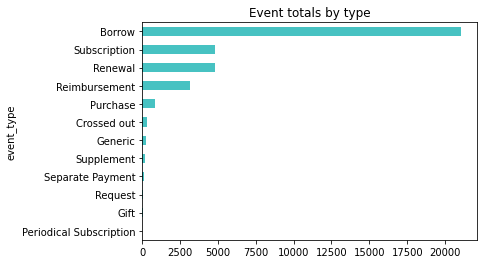

In [ ]:
# number of events by type; generate bar plot using value_counts
events_df.value_counts("event_type").sort_values().plot(kind='barh', title='Event totals by type', color='#47C2C2')

<AxesSubplot:title={'center':'Event totals by type'}, ylabel='None'>

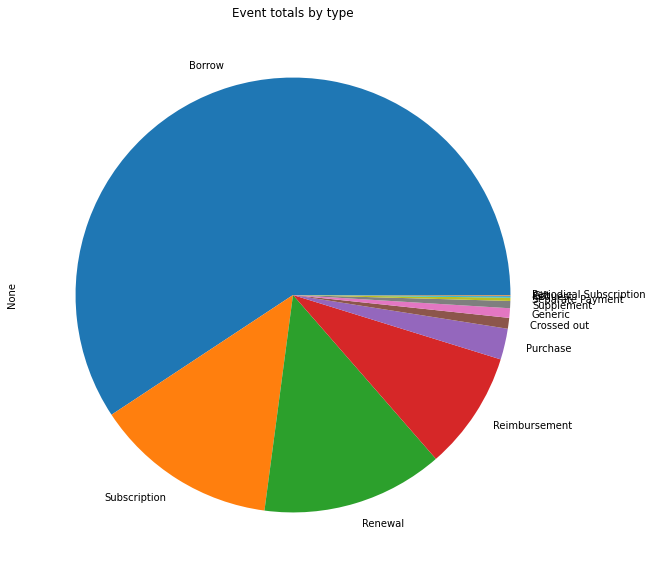

In [ ]:
events_df.value_counts("event_type").plot(kind='pie', figsize=(10, 10), title='Event totals by type')

<AxesSubplot:ylabel='event_type'>

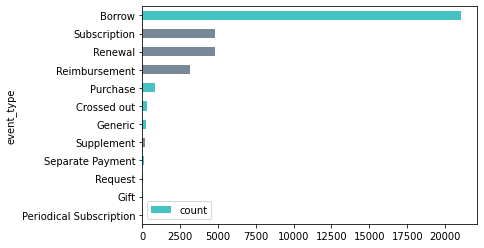

In [ ]:
# distinguish membership and book activities by color
event_type_totals = event_type_totals.sort_values(['count'])
membership_events = ['Renewal', 'Subscription', 'Reimbursement', 'Supplement', 'Separate Deposit']
# color membership events differently
colors = ['lightslategray' if evt in membership_events else '#47C2C2' for evt in event_type_totals.event_type]
event_type_totals.plot.barh(x='event_type', y='count', color=colors)

## event totals by year

In [ ]:
events_year = events_df
events_year['year'] = events_year.start_date.str.extract(r'(?P<year>(?:\d{4}|-))')
# convert unknown years to None
events_year.year.replace('-', None, inplace=True)
events_by_year = events_year.groupby(["year"]).size().reset_index(name='count').sort_values(['year'])
events_by_year

,year,count
0,1919,103
1,1920,652
2,1921,962
3,1922,1171
4,1923,1384
5,1924,1588
6,1925,1679
7,1926,2087
8,1927,1480
9,1928,1434


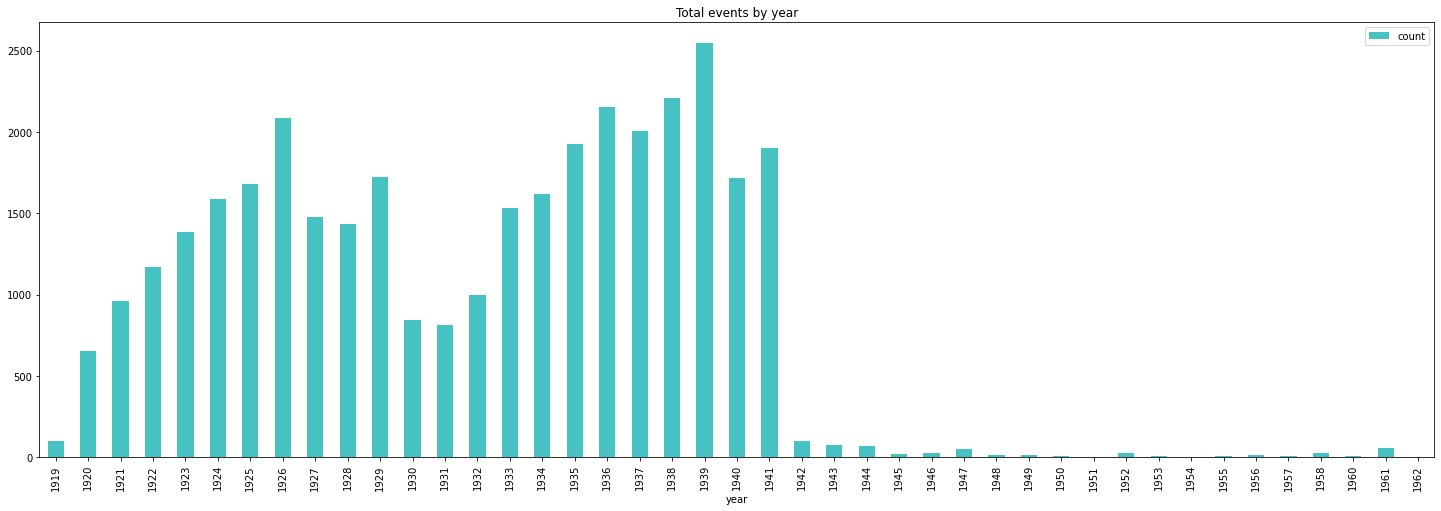

In [ ]:
plot = events_by_year.plot.bar(x='year', y='count', figsize=(25,8), title='Total events by year', color="#47C2C2")
plot.figure.savefig('event_totals_by_year.png')

## joint accounts

In [ ]:
joint_account_events = events_df[events_df['member_uris'].str.contains(";")]
print('%d events from joint accounts' % len(joint_account_events))
print('%d joint accounts' % len(joint_account_events.member_uris.unique()))


557 events from joint accounts
49 joint accounts


## end date known when start date is unknown

In [ ]:
#no_start = events_df.dropna(subset=['start_date'])
no_start = events_df.copy()
no_start = no_start[~no_start.end_date.isnull()]
no_start = no_start[no_start.start_date.isnull()]
print('%d events with end date but no start' % len(no_start))
no_start.head()

36 events with end date but no start


,event_type,start_date,end_date,member_uris,member_names,member_sort_names,subscription_price_paid,subscription_deposit,subscription_duration,subscription_duration_days,...,item_year,item_notes,source_type,source_citation,source_manifest,source_image,start_year,end_year,year,has_year
534,Borrow,NaN,1935-12,https://shakespeareandco.princeton.edu/members...,Colette Weiss,"Weiss, Colette",NaN,NaN,NaN,NaN,...,NaN,NaN,Lending Library Card,"Sylvia Beach, Mme Collette Weiss Lending Libra...",https://figgy.princeton.edu/concern/scanned_re...,https://iiif.princeton.edu/loris/figgy_prod/ac...,None,1935,NaN,1
573,Borrow,NaN,1944-06,https://shakespeareandco.princeton.edu/members...,Hélène de Wendel / Comtesse de Noailles,"de Wendel, Hélène",NaN,NaN,NaN,NaN,...,1883.0,NaN,Lending Library Card,"Sylvia Beach, Madame Hélène Wendel Lending Lib...",https://figgy.princeton.edu/concern/scanned_re...,https://iiif-cloud.princeton.edu/iiif/2/0c%2F5...,None,1944,NaN,1
616,Borrow,NaN,--02-01,https://shakespeareandco.princeton.edu/members...,James Joyce,"Joyce, James",NaN,NaN,NaN,NaN,...,1912.0,NaN,Lending Library Card,James Joyce's lending library cards not repres...,NaN,NaN,None,,NaN,1
1419,Borrow,NaN,1921-05-19,https://shakespeareandco.princeton.edu/members...,Mr. Morgan,"Morgan, Mr.",NaN,NaN,NaN,NaN,...,1920.0,NaN,Lending Library Card,"Sylvia Beach, Mr Morgan Lending Library Card, ...",https://figgy.princeton.edu/concern/scanned_re...,https://iiif-cloud.princeton.edu/iiif/2/ee%2F0...,None,1921,NaN,1
2196,Borrow,NaN,1922-06-13,https://shakespeareandco.princeton.edu/members...,Colette Ottensooser,"Ottensooser, Colette",NaN,NaN,NaN,NaN,...,1915.0,NaN,Lending Library Card,"Sylvia Beach, Colette Ottensooser Lending Libr...",https://figgy.princeton.edu/concern/scanned_re...,https://iiif.princeton.edu/loris/figgy_prod/18...,None,1922,NaN,1


In [ ]:
no_start_type = no_start.groupby(["event_type"]).size().reset_index(name='count').sort_values(['count'], ascending=False)
no_start_type

,event_type,count
0,Borrow,36


## partial date totals

In [ ]:
event_dates = events_df.copy()
date_regex = r'(?P<year>(?:\d{4}|-))-?(?P<month>\d{2})?-?(?P<day>\d{2})?'
event_dates[['start_year','start_month','start_day']] = event_dates.start_date.str.extract(date_regex, expand=True)
event_dates[['end_year','end_month','end_day']] = event_dates.end_date.str.extract(date_regex, expand=True)
# convert unknown years to None
event_dates.start_year.replace('-', None, inplace=True)
event_dates.end_year.replace('-', None, inplace=True)
event_dates[['start_date', 'start_year', 'start_month', 'start_day', 'end_date', 'end_year', 'end_month', 'end_day']]

,start_date,start_year,start_month,start_day,end_date,end_year,end_month,end_day
0,1920,1920,NaN,NaN,NaN,NaN,NaN,NaN
1,1921,1921,NaN,NaN,NaN,NaN,NaN,NaN
2,1922,1922,NaN,NaN,1922-08-23,1922,08,23
3,1922,1922,NaN,NaN,NaN,NaN,NaN,NaN
4,1922,1922,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
35518,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35519,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35520,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35521,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### no dates known

In [ ]:
no_date = event_dates[event_dates.start_date.isnull() & event_dates.end_date.isnull()]
print('%d events with no date' % len(no_date))
no_date.head(10)

383 events with no date


,event_type,start_date,end_date,member_uris,member_names,member_sort_names,subscription_price_paid,subscription_deposit,subscription_duration,subscription_duration_days,...,source_manifest,source_image,start_year,end_year,year,has_year,start_month,start_day,end_month,end_day
35140,Reimbursement,NaN,NaN,https://shakespeareandco.princeton.edu/members...,R. Constable,"Constable, R.",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN
35141,Reimbursement,NaN,NaN,https://shakespeareandco.princeton.edu/members...,Father Gill,"Gill, Father",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN
35142,Reimbursement,NaN,NaN,https://shakespeareandco.princeton.edu/members...,Mlle de Ginestet,"Ginestet, Mlle de",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN
35143,Reimbursement,NaN,NaN,https://shakespeareandco.princeton.edu/members...,Mr. Goff,"Goff, Mr.",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN
35144,Reimbursement,NaN,NaN,https://shakespeareandco.princeton.edu/members...,Mrs. Gordon-Brown,"Gordon-Brown, Mrs.",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN
35145,Reimbursement,NaN,NaN,https://shakespeareandco.princeton.edu/members...,Mlle Goukowsky / Goukowska,Mlle Goukowsky,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN
35146,Reimbursement,NaN,NaN,https://shakespeareandco.princeton.edu/members...,Mrs. Robert Grant,"Grant, Mrs. Robert",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN
35147,Reimbursement,NaN,NaN,https://shakespeareandco.princeton.edu/members...,Freeman Gray,"Gray, Freeman",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN
35148,Reimbursement,NaN,NaN,https://shakespeareandco.princeton.edu/members...,Mrs. D. O. Gray,"Gray, Mrs. D. O.",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN
35149,Reimbursement,NaN,NaN,https://shakespeareandco.princeton.edu/members...,Mrs. G. S. Connor,"Connor, Mrs. G. S.",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN


### year only

In [ ]:
# remove all events with no start or end date
year_only = event_dates[~(event_dates.start_date.isnull() & event_dates.end_date.isnull())]
# remove either month known
year_only = year_only[year_only.start_month.isnull() & year_only.end_month.isnull()]
year_only = year_only[year_only.start_day.isnull() & year_only.end_day.isnull()]
print('%d events with year only' % len(year_only))
year_only

159 events with year only


,event_type,start_date,end_date,member_uris,member_names,member_sort_names,subscription_price_paid,subscription_deposit,subscription_duration,subscription_duration_days,...,source_manifest,source_image,start_year,end_year,year,has_year,start_month,start_day,end_month,end_day
0,Generic,1920,NaN,https://shakespeareandco.princeton.edu/members...,Raymonde Linossier,"Linossier, Raymonde",NaN,NaN,NaN,NaN,...,https://figgy.princeton.edu/concern/scanned_re...,https://iiif.princeton.edu/loris/figgy_prod/00...,1920,NaN,1920,1,NaN,NaN,NaN,NaN
1,Subscription,1921,NaN,https://shakespeareandco.princeton.edu/members...,Mme Garreta,"Garreta, Mme",NaN,NaN,NaN,NaN,...,NaN,NaN,1921,NaN,1921,1,NaN,NaN,NaN,NaN
3,Generic,1922,NaN,https://shakespeareandco.princeton.edu/members...,Ernest Walsh,"Walsh, Ernest",NaN,NaN,NaN,NaN,...,https://figgy.princeton.edu/concern/scanned_re...,https://iiif.princeton.edu/loris/figgy_prod/af...,1922,NaN,1922,1,NaN,NaN,NaN,NaN
4,Subscription,1922,NaN,https://shakespeareandco.princeton.edu/members...,Mr. Lincoln,"Lincoln, Mr.",NaN,7.0,NaN,NaN,...,NaN,NaN,1922,NaN,1922,1,NaN,NaN,NaN,NaN
5,Crossed out,1923,NaN,https://shakespeareandco.princeton.edu/members...,Mr. Morgan,"Morgan, Mr.",NaN,NaN,NaN,NaN,...,https://figgy.princeton.edu/concern/scanned_re...,https://iiif-cloud.princeton.edu/iiif/2/1d%2F0...,1923,NaN,1923,1,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204,Generic,1958,NaN,https://shakespeareandco.princeton.edu/members...,Louis Falquel,"Falquel, Louis",NaN,NaN,NaN,NaN,...,https://figgy.princeton.edu/concern/scanned_re...,https://iiif.princeton.edu/loris/figgy_prod/96...,1958,NaN,1958,1,NaN,NaN,NaN,NaN
205,Generic,1958,NaN,https://shakespeareandco.princeton.edu/members...,Louis Falquel,"Falquel, Louis",NaN,NaN,NaN,NaN,...,https://figgy.princeton.edu/concern/scanned_re...,https://iiif.princeton.edu/loris/figgy_prod/96...,1958,NaN,1958,1,NaN,NaN,NaN,NaN
206,Generic,1958,NaN,https://shakespeareandco.princeton.edu/members...,Louis Falquel,"Falquel, Louis",NaN,NaN,NaN,NaN,...,https://figgy.princeton.edu/concern/scanned_re...,https://iiif.princeton.edu/loris/figgy_prod/96...,1958,NaN,1958,1,NaN,NaN,NaN,NaN
207,Generic,1958,NaN,https://shakespeareandco.princeton.edu/members...,Louis Falquel,"Falquel, Louis",NaN,NaN,NaN,NaN,...,https://figgy.princeton.edu/concern/scanned_re...,https://iiif.princeton.edu/loris/figgy_prod/96...,1958,NaN,1958,1,NaN,NaN,NaN,NaN


### year/month only

In [ ]:
# remove all events with no start or end date
yearmonth_only = event_dates[~(event_dates.start_date.isnull() & event_dates.end_date.isnull())]
# remove day known
yearmonth_only = yearmonth_only[yearmonth_only.start_day.isnull() & yearmonth_only.end_day.isnull()]
print('%d events with year/month only' % len(yearmonth_only))
yearmonth_only

494 events with year/month only


,event_type,start_date,end_date,member_uris,member_names,member_sort_names,subscription_price_paid,subscription_deposit,subscription_duration,subscription_duration_days,...,source_manifest,source_image,start_year,end_year,year,has_year,start_month,start_day,end_month,end_day
0,Generic,1920,NaN,https://shakespeareandco.princeton.edu/members...,Raymonde Linossier,"Linossier, Raymonde",NaN,NaN,NaN,NaN,...,https://figgy.princeton.edu/concern/scanned_re...,https://iiif.princeton.edu/loris/figgy_prod/00...,1920,NaN,1920,1,NaN,NaN,NaN,NaN
1,Subscription,1921,NaN,https://shakespeareandco.princeton.edu/members...,Mme Garreta,"Garreta, Mme",NaN,NaN,NaN,NaN,...,NaN,NaN,1921,NaN,1921,1,NaN,NaN,NaN,NaN
3,Generic,1922,NaN,https://shakespeareandco.princeton.edu/members...,Ernest Walsh,"Walsh, Ernest",NaN,NaN,NaN,NaN,...,https://figgy.princeton.edu/concern/scanned_re...,https://iiif.princeton.edu/loris/figgy_prod/af...,1922,NaN,1922,1,NaN,NaN,NaN,NaN
4,Subscription,1922,NaN,https://shakespeareandco.princeton.edu/members...,Mr. Lincoln,"Lincoln, Mr.",NaN,7.0,NaN,NaN,...,NaN,NaN,1922,NaN,1922,1,NaN,NaN,NaN,NaN
5,Crossed out,1923,NaN,https://shakespeareandco.princeton.edu/members...,Mr. Morgan,"Morgan, Mr.",NaN,NaN,NaN,NaN,...,https://figgy.princeton.edu/concern/scanned_re...,https://iiif-cloud.princeton.edu/iiif/2/1d%2F0...,1923,NaN,1923,1,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
585,Borrow,1947-05,NaN,https://shakespeareandco.princeton.edu/members...,Anne Yeats,"Yeats, Anne",NaN,NaN,NaN,NaN,...,https://figgy.princeton.edu/concern/scanned_re...,https://iiif.princeton.edu/loris/figgy_prod/57...,1947,NaN,1947,1,05,NaN,NaN,NaN
586,Borrow,1947-05,NaN,https://shakespeareandco.princeton.edu/members...,Anne Yeats,"Yeats, Anne",NaN,NaN,NaN,NaN,...,https://figgy.princeton.edu/concern/scanned_re...,https://iiif.princeton.edu/loris/figgy_prod/57...,1947,NaN,1947,1,05,NaN,NaN,NaN
587,Borrow,1947-05,NaN,https://shakespeareandco.princeton.edu/members...,Anne Yeats,"Yeats, Anne",NaN,NaN,NaN,NaN,...,https://figgy.princeton.edu/concern/scanned_re...,https://iiif.princeton.edu/loris/figgy_prod/57...,1947,NaN,1947,1,05,NaN,NaN,NaN
588,Borrow,1947-05,NaN,https://shakespeareandco.princeton.edu/members...,Anne Yeats,"Yeats, Anne",NaN,NaN,NaN,NaN,...,https://figgy.princeton.edu/concern/scanned_re...,https://iiif.princeton.edu/loris/figgy_prod/57...,1947,NaN,1947,1,05,NaN,NaN,NaN


### day/month only

In [ ]:
# remove all events with no start or end date
monthday_only = event_dates[~(event_dates.start_date.isnull() & event_dates.end_date.isnull())]
# remove year unknown
monthday_only = monthday_only[monthday_only.start_year.isnull() & monthday_only.end_year.isnull()]
# require either month known
monthday_only = monthday_only[~monthday_only.start_month.isnull() | ~monthday_only.end_month.isnull()]
# require either day known
monthday_only = monthday_only[~monthday_only.start_day.isnull() | ~monthday_only.end_day.isnull()]

print('%d events with month/day only' % len(monthday_only))
monthday_only

55 events with month/day only


,event_type,start_date,end_date,member_uris,member_names,member_sort_names,subscription_price_paid,subscription_deposit,subscription_duration,subscription_duration_days,...,source_manifest,source_image,start_year,end_year,year,has_year,start_month,start_day,end_month,end_day
616,Borrow,NaN,--02-01,https://shakespeareandco.princeton.edu/members...,James Joyce,"Joyce, James",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,02,01
617,Borrow,--02-04,--02-11,https://shakespeareandco.princeton.edu/members...,G. E. Pulsford,"Pulsford, G. E.",NaN,NaN,NaN,NaN,...,https://figgy.princeton.edu/concern/scanned_re...,https://iiif.princeton.edu/loris/figgy_prod/17...,NaN,NaN,NaN,1,02,04,02,11
618,Crossed out,--02-10,NaN,https://shakespeareandco.princeton.edu/members...,Mr. Morgan,"Morgan, Mr.",NaN,NaN,NaN,NaN,...,https://figgy.princeton.edu/concern/scanned_re...,https://iiif-cloud.princeton.edu/iiif/2/cc%2Ff...,NaN,NaN,NaN,0,02,10,NaN,NaN
619,Borrow,--02-11,--02-18,https://shakespeareandco.princeton.edu/members...,G. E. Pulsford,"Pulsford, G. E.",NaN,NaN,NaN,NaN,...,https://figgy.princeton.edu/concern/scanned_re...,https://iiif.princeton.edu/loris/figgy_prod/17...,NaN,NaN,NaN,1,02,11,02,18
620,Borrow,--02-18,--02-28,https://shakespeareandco.princeton.edu/members...,G. E. Pulsford,"Pulsford, G. E.",NaN,NaN,NaN,NaN,...,https://figgy.princeton.edu/concern/scanned_re...,https://iiif.princeton.edu/loris/figgy_prod/17...,NaN,NaN,NaN,1,02,18,02,28
621,Generic,--02-28,NaN,https://shakespeareandco.princeton.edu/members...,Pierre Denis,"Denis, Pierre",NaN,NaN,NaN,NaN,...,https://figgy.princeton.edu/concern/scanned_re...,https://iiif.princeton.edu/loris/figgy_prod/b2...,NaN,NaN,NaN,0,02,28,NaN,NaN
622,Generic,--02-28,NaN,https://shakespeareandco.princeton.edu/members...,Pierre Denis,"Denis, Pierre",NaN,NaN,NaN,NaN,...,https://figgy.princeton.edu/concern/scanned_re...,https://iiif.princeton.edu/loris/figgy_prod/b2...,NaN,NaN,NaN,0,02,28,NaN,NaN
623,Generic,--02-28,NaN,https://shakespeareandco.princeton.edu/members...,Pierre Denis,"Denis, Pierre",NaN,NaN,NaN,NaN,...,https://figgy.princeton.edu/concern/scanned_re...,https://iiif.princeton.edu/loris/figgy_prod/b2...,NaN,NaN,NaN,0,02,28,NaN,NaN
624,Generic,--02-28,NaN,https://shakespeareandco.princeton.edu/members...,Pierre Denis,"Denis, Pierre",NaN,NaN,NaN,NaN,...,https://figgy.princeton.edu/concern/scanned_re...,https://iiif.princeton.edu/loris/figgy_prod/b2...,NaN,NaN,NaN,0,02,28,NaN,NaN
625,Generic,--02-28,NaN,https://shakespeareandco.princeton.edu/members...,Pierre Denis,"Denis, Pierre",NaN,NaN,NaN,NaN,...,https://figgy.princeton.edu/concern/scanned_re...,https://iiif.princeton.edu/loris/figgy_prod/b2...,NaN,NaN,NaN,0,02,28,NaN,NaN


### reimbursements unknown or partial

In [ ]:
reimbursements = event_dates[event_dates.event_type == 'Reimbursement'].copy()
reimbursements

reimbursements['has_date'] = reimbursements.apply(lambda x: True if (pd.notna(x.start_date) or pd.notna(x.end_date)) else False, axis=1)
reimbursements['partial_date'] = reimbursements.start_date.apply(lambda x: True if pd.notna(x) and len(x) < 10  else False)

print('%d with no date' % reimbursements[~reimbursements.has_date].shape[0])
print('%d with partial date' % reimbursements[reimbursements.partial_date].shape[0])
print('%d with partial or no date' % reimbursements[~reimbursements.has_date | reimbursements.partial_date].shape[0])

reimbursements[~reimbursements.has_date | reimbursements.partial_date]

# # reimbursements['partial_date'] = reimbursements[(reimbursements.start_year.isnull() & reimbursements.end_year.isnull()) | (reimbursements.start_month.isnull() & reimbursements.end_month.isnull()) | (reimbursements.start_day.isnull() & reimbursements.end_day.isnull()) ]

# # nodate_reimbursements = reimbursements[(reimbursements.start_date.isnull() & reimbursements.end_date.isnull())]
# # print(nodate_reimbursements.shape[0])
# nodate_reimbursements.head()
# nodate_reimbursements = event_dates[event_dates.start_date.isnull() & event_dates.end_date.isnull()]


282 with no date
8 with partial date
290 with partial or no date


,event_type,start_date,end_date,member_uris,member_names,member_sort_names,subscription_price_paid,subscription_deposit,subscription_duration,subscription_duration_days,...,start_year,end_year,year,has_year,start_month,start_day,end_month,end_day,has_date,partial_date
43,Reimbursement,1930,1930,https://shakespeareandco.princeton.edu/members...,V. M. Jones,"Jones, V. M.",NaN,NaN,NaN,NaN,...,1930,1930,1930,1,NaN,NaN,NaN,NaN,True,True
73,Reimbursement,1932,1932,https://shakespeareandco.princeton.edu/members...,Ruth Allen,"Allen, Ruth",NaN,NaN,NaN,NaN,...,1932,1932,1932,1,NaN,NaN,NaN,NaN,True,True
102,Reimbursement,1932,1932,https://shakespeareandco.princeton.edu/members...,Madeleine Collet,"Collet, Madeleine",NaN,NaN,NaN,NaN,...,1932,1932,1932,1,NaN,NaN,NaN,NaN,True,True
136,Reimbursement,1934,1934,https://shakespeareandco.princeton.edu/members...,Rollande Deshages,"Deshages, Rollande",NaN,NaN,NaN,NaN,...,1934,1934,1934,1,NaN,NaN,NaN,NaN,True,True
538,Reimbursement,1937-01,1937-01,https://shakespeareandco.princeton.edu/members...,Mr. Vanderpyl,"Vanderpyl, Mr.",NaN,NaN,NaN,NaN,...,1937,1937,1937,1,01,NaN,01,NaN,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35512,Reimbursement,NaN,NaN,https://shakespeareandco.princeton.edu/members...,Mrs. N. F. Connont,"Connont, Mrs. N. F.",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,False,False
35517,Reimbursement,NaN,NaN,https://shakespeareandco.princeton.edu/members...,Austin Clarke,"Clarke, Austin",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,False,False
35518,Reimbursement,NaN,NaN,https://shakespeareandco.princeton.edu/members...,Henri Gutmann,"Gutmann, Henri",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,False,False
35520,Reimbursement,NaN,NaN,https://shakespeareandco.princeton.edu/members...,Mr. Baldwin,"Baldwin, Mr.",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,False,False


## borrow status

In [ ]:
borrows = events_df[events_df.event_type == 'Borrow']
total_borrows = len(borrows)
print('{:,} borrowing events'.format(total_borrows))
borrow_status_totals = borrows.groupby(["borrow_status"]).size().reset_index(name='count').sort_values(['count'], ascending=False)
borrow_status_totals['percent'] = borrow_status_totals['count'].apply(lambda x: (x / total_borrows) * 100)
borrow_status_totals.percent = borrow_status_totals.percent.round(2)
borrow_status_totals

21,059 borrowing events


,borrow_status,count,percent
2,Returned,20429,97.01
3,Unknown,613,2.91
0,Bought,13,0.06
1,Missing,4,0.02


## purchase price known

In [ ]:
purchases = events_df[events_df.event_type == 'Purchase']
print('%d total purchases' % len(purchases))
noprice_purchases = purchases[purchases['purchase_price'].isnull()]
print('%d purchases with no known price' % len(noprice_purchases))
noprice_purchases

818 total purchases
72 purchases with no known price


,event_type,start_date,end_date,member_uris,member_names,member_sort_names,subscription_price_paid,subscription_deposit,subscription_duration,subscription_duration_days,...,item_year,item_notes,source_type,source_citation,source_manifest,source_image,start_year,end_year,year,has_year
139,Purchase,1936,1936,https://shakespeareandco.princeton.edu/members...,Donald Culver,"Culver, Donald",NaN,NaN,NaN,NaN,...,NaN,NaN,Lending Library Card,"Sylvia Beach, Donald Culver Lending Library Ca...",https://figgy.princeton.edu/concern/scanned_re...,https://iiif.princeton.edu/loris/figgy_prod/2b...,1936,1936,1936,1
142,Purchase,1936,1936,https://shakespeareandco.princeton.edu/members...,Donald Culver,"Culver, Donald",NaN,NaN,NaN,NaN,...,NaN,NaN,Lending Library Card,"Sylvia Beach, Donald Culver Lending Library Ca...",https://figgy.princeton.edu/concern/scanned_re...,https://iiif.princeton.edu/loris/figgy_prod/2b...,1936,1936,1936,1
143,Purchase,1936,1936,https://shakespeareandco.princeton.edu/members...,Donald Culver,"Culver, Donald",NaN,NaN,NaN,NaN,...,NaN,NaN,Lending Library Card,"Sylvia Beach, Donald Culver Lending Library Ca...",https://figgy.princeton.edu/concern/scanned_re...,https://iiif.princeton.edu/loris/figgy_prod/2b...,1936,1936,1936,1
572,Purchase,1944-06,1944-06,https://shakespeareandco.princeton.edu/members...,Hélène de Wendel / Comtesse de Noailles,"de Wendel, Hélène",NaN,NaN,NaN,NaN,...,1925.0,NaN,Lending Library Card,"Sylvia Beach, Madame Hélène Wendel Lending Lib...",https://figgy.princeton.edu/concern/scanned_re...,https://iiif-cloud.princeton.edu/iiif/2/0c%2F5...,1944,1944,1944,1
934,Purchase,1920-06-03,1920-06-03,https://shakespeareandco.princeton.edu/members...,Isabelle Zimmer,"Zimmer, Isabelle",NaN,NaN,NaN,NaN,...,1912.0,NaN,Lending Library Card,"Sylvia Beach, Isabelle Zimmer Lending Library ...",https://figgy.princeton.edu/concern/scanned_re...,https://iiif.princeton.edu/loris/figgy_prod/11...,1920,1920,1920,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25718,Purchase,1939-07-24,1939-07-24,https://shakespeareandco.princeton.edu/members...,Mrs. Thornton Baker,"Baker, Mrs. Thornton",NaN,NaN,NaN,NaN,...,1939.0,NaN,Lending Library Card,"Sylvia Beach, Mrs. Thornton Baker Lending Libr...",https://figgy.princeton.edu/concern/scanned_re...,https://iiif-cloud.princeton.edu/iiif/2/98%2F5...,1939,1939,1939,1
26000,Purchase,1939-11-16,1939-11-16,https://shakespeareandco.princeton.edu/members...,Jeanine (Delpech) Teissier,"Teissier, Jeanine",NaN,NaN,NaN,NaN,...,1939.0,NaN,Lending Library Card,"Sylvia Beach, Teissier Lending Library Card, B...",https://figgy.princeton.edu/concern/scanned_re...,https://iiif.princeton.edu/loris/figgy_prod/31...,1939,1939,1939,1
27027,Purchase,1940-04-26,1940-04-26,https://shakespeareandco.princeton.edu/members...,Jeanine (Delpech) Teissier,"Teissier, Jeanine",NaN,NaN,NaN,NaN,...,1940.0,NaN,Lending Library Card,"Sylvia Beach, Teissier Lending Library Card, B...",https://figgy.princeton.edu/concern/scanned_re...,https://iiif.princeton.edu/loris/figgy_prod/a3...,1940,1940,1940,1
35361,Purchase,NaN,NaN,https://shakespeareandco.princeton.edu/members...,Mme le Moal,"Moal, Mme le",NaN,NaN,NaN,NaN,...,1913.0,NaN,Lending Library Card;Lending Library Card,"Sylvia Beach, Mrs le Moal Lending Library Card...",https://figgy.princeton.edu/concern/scanned_re...,https://iiif.princeton.edu/loris/figgy_prod/af...,None,None,NaN,0


## reimbursement refund amount known


In [ ]:
reimbursements = events_df[events_df.event_type == 'Reimbursement']
print('%d total reimbursements' % len(reimbursements))
noprice_reimbursements = reimbursements[reimbursements['reimbursement_refund'].isnull()]
print('%d reimbursements with no known refund' % len(noprice_reimbursements))
noprice_reimbursements

3126 total reimbursements
315 reimbursements with no known refund


,event_type,start_date,end_date,member_uris,member_names,member_sort_names,subscription_price_paid,subscription_deposit,subscription_duration,subscription_duration_days,...,item_year,item_notes,source_type,source_citation,source_manifest,source_image,start_year,end_year,year,has_year
43,Reimbursement,1930,1930,https://shakespeareandco.princeton.edu/members...,V. M. Jones,"Jones, V. M.",NaN,NaN,NaN,NaN,...,NaN,NaN,Address Book,"Sylvia Beach, Address Book 1919–1935, box 69, ...",NaN,NaN,1930,1930,1930,1
73,Reimbursement,1932,1932,https://shakespeareandco.princeton.edu/members...,Ruth Allen,"Allen, Ruth",NaN,NaN,NaN,NaN,...,NaN,NaN,Address Book,"Sylvia Beach, Address Book 1919–1935, box 69, ...",NaN,NaN,1932,1932,1932,1
102,Reimbursement,1932,1932,https://shakespeareandco.princeton.edu/members...,Madeleine Collet,"Collet, Madeleine",NaN,NaN,NaN,NaN,...,NaN,NaN,Address Book,"Sylvia Beach, Address Book 1919–1935, box 69, ...",NaN,NaN,1932,1932,1932,1
136,Reimbursement,1934,1934,https://shakespeareandco.princeton.edu/members...,Rollande Deshages,"Deshages, Rollande",NaN,NaN,NaN,NaN,...,NaN,NaN,Address Book,"Sylvia Beach, Address Book 1919–1935, box 69, ...",NaN,NaN,1934,1934,1934,1
538,Reimbursement,1937-01,1937-01,https://shakespeareandco.princeton.edu/members...,Mr. Vanderpyl,"Vanderpyl, Mr.",NaN,NaN,NaN,NaN,...,NaN,NaN,Address Book,"Sylvia Beach, Address Book 1935–1937, box 70, ...",NaN,NaN,1937,1937,1937,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35512,Reimbursement,NaN,NaN,https://shakespeareandco.princeton.edu/members...,Mrs. N. F. Connont,"Connont, Mrs. N. F.",NaN,NaN,NaN,NaN,...,NaN,NaN,Address Book,"Sylvia Beach, Address Book 1919–1935, box 69, ...",NaN,NaN,None,None,NaN,0
35517,Reimbursement,NaN,NaN,https://shakespeareandco.princeton.edu/members...,Austin Clarke,"Clarke, Austin",NaN,NaN,NaN,NaN,...,NaN,NaN,Address Book,"Sylvia Beach, Address Book 1919–1935, box 69, ...",NaN,NaN,None,None,NaN,0
35518,Reimbursement,NaN,NaN,https://shakespeareandco.princeton.edu/members...,Henri Gutmann,"Gutmann, Henri",NaN,NaN,NaN,NaN,...,NaN,NaN,Address Book,"Sylvia Beach, Address Book 1919–1935, box 69, ...",NaN,NaN,None,None,NaN,0
35520,Reimbursement,NaN,NaN,https://shakespeareandco.princeton.edu/members...,Mr. Baldwin,"Baldwin, Mr.",NaN,NaN,NaN,NaN,...,NaN,NaN,Address Book,"Sylvia Beach, Address Book 1919–1935, box 69, ...",NaN,NaN,None,None,NaN,0


## subscriptions with no volume

In [ ]:
# only events labeled as subscriptions
subs = events_df[events_df.event_type == 'Subscription']
subs[subs.subscription_volumes.isna()]

,event_type,start_date,end_date,member_uris,member_names,member_sort_names,subscription_price_paid,subscription_deposit,subscription_duration,subscription_duration_days,...,item_year,item_notes,source_type,source_citation,source_manifest,source_image,start_year,end_year,year,has_year
1,Subscription,1921,NaN,https://shakespeareandco.princeton.edu/members...,Mme Garreta,"Garreta, Mme",NaN,NaN,NaN,NaN,...,NaN,NaN,Address Book,"Sylvia Beach, Address Book 1919–1935, box 69, ...",NaN,NaN,1921,None,1921,1
4,Subscription,1922,NaN,https://shakespeareandco.princeton.edu/members...,Mr. Lincoln,"Lincoln, Mr.",NaN,7.0,NaN,NaN,...,NaN,NaN,Address Book,"Sylvia Beach, Address Book 1919–1935, box 69, ...",NaN,NaN,1922,None,1922,1
6,Subscription,1923,1923,https://shakespeareandco.princeton.edu/members...,S. Q. Millward,"Millward, S. Q.",NaN,NaN,NaN,NaN,...,NaN,NaN,Address Book,"Sylvia Beach, Address Book 1919–1935, box 69, ...",NaN,NaN,1923,1923,1923,1
7,Subscription,1923,NaN,https://shakespeareandco.princeton.edu/members...,Mr. Foulquier,"Foulquier, Mr.",NaN,NaN,NaN,NaN,...,NaN,NaN,Address Book,"Sylvia Beach, Address Book 1919–1935, box 69, ...",NaN,NaN,1923,None,1923,1
9,Subscription,1923,NaN,https://shakespeareandco.princeton.edu/members...,Mrs. Hefferson,"Hefferson, Mrs.",NaN,NaN,NaN,NaN,...,NaN,NaN,Address Book,"Sylvia Beach, Address Book 1919–1935, box 69, ...",NaN,NaN,1923,None,1923,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34808,Subscription,1940-04-20,NaN,https://shakespeareandco.princeton.edu/members...,Loewy,Loewy,NaN,8.0,NaN,NaN,...,NaN,NaN,Logbook,"Sylvia Beach, Logbooks 1919–1941, Sylvia Beach...",NaN,NaN,1940,None,1940,1
34828,Subscription,1940-05-21,1940-06-04,https://shakespeareandco.princeton.edu/members...,Stamp,Stamp,25.0,50.0,2 weeks,14.0,...,NaN,NaN,Logbook,"Sylvia Beach, Logbooks 1919–1941, Sylvia Beach...",NaN,NaN,1940,1940,1940,1
34850,Subscription,1940-09-03,NaN,https://shakespeareandco.princeton.edu/members...,Maisonneuve,Maisonneuve,45.0,100.0,NaN,NaN,...,NaN,NaN,Logbook,"Sylvia Beach, Logbooks 1919–1941, Sylvia Beach...",NaN,NaN,1940,None,1940,1
35048,Subscription,1941-06-14,1941-06-20,https://shakespeareandco.princeton.edu/members...,Pereira,Pereira,50.0,NaN,6 days,6.0,...,NaN,NaN,Logbook,"Sylvia Beach, Logbooks 1919–1941, Sylvia Beach...",NaN,NaN,1941,1941,1941,1


In [ ]:
# subscriptions and renewals
subsrenew = events_df[events_df.event_type.isin(['Subscription', 'Renewal'])]
subsrenew[subsrenew.subscription_volumes.isna()]

,event_type,start_date,end_date,member_uris,member_names,member_sort_names,subscription_price_paid,subscription_deposit,subscription_duration,subscription_duration_days,...,item_year,item_notes,source_type,source_citation,source_manifest,source_image,start_year,end_year,year,has_year
1,Subscription,1921,NaN,https://shakespeareandco.princeton.edu/members...,Mme Garreta,"Garreta, Mme",NaN,NaN,NaN,NaN,...,NaN,NaN,Address Book,"Sylvia Beach, Address Book 1919–1935, box 69, ...",NaN,NaN,1921,None,1921,1
4,Subscription,1922,NaN,https://shakespeareandco.princeton.edu/members...,Mr. Lincoln,"Lincoln, Mr.",NaN,7.0,NaN,NaN,...,NaN,NaN,Address Book,"Sylvia Beach, Address Book 1919–1935, box 69, ...",NaN,NaN,1922,None,1922,1
6,Subscription,1923,1923,https://shakespeareandco.princeton.edu/members...,S. Q. Millward,"Millward, S. Q.",NaN,NaN,NaN,NaN,...,NaN,NaN,Address Book,"Sylvia Beach, Address Book 1919–1935, box 69, ...",NaN,NaN,1923,1923,1923,1
7,Subscription,1923,NaN,https://shakespeareandco.princeton.edu/members...,Mr. Foulquier,"Foulquier, Mr.",NaN,NaN,NaN,NaN,...,NaN,NaN,Address Book,"Sylvia Beach, Address Book 1919–1935, box 69, ...",NaN,NaN,1923,None,1923,1
9,Subscription,1923,NaN,https://shakespeareandco.princeton.edu/members...,Mrs. Hefferson,"Hefferson, Mrs.",NaN,NaN,NaN,NaN,...,NaN,NaN,Address Book,"Sylvia Beach, Address Book 1919–1935, box 69, ...",NaN,NaN,1923,None,1923,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35064,Renewal,1941-07-10,1941-07-24,https://shakespeareandco.princeton.edu/members...,Mr. Wagner,"Wagner, Mr.",10.00,NaN,2 weeks,14.0,...,NaN,NaN,Logbook,"Sylvia Beach, Logbooks 1919–1941, Sylvia Beach...",NaN,NaN,1941,1941,1941,1
35075,Renewal,1941-08-01,1941-08-08,https://shakespeareandco.princeton.edu/members...,Stark,Stark,6.25,NaN,1 week,7.0,...,NaN,NaN,Logbook,"Sylvia Beach, Logbooks 1919–1941, Sylvia Beach...",NaN,NaN,1941,1941,1941,1
35078,Renewal,1941-08-01,1941-08-15,https://shakespeareandco.princeton.edu/members...,Huret,Huret,20.00,NaN,2 weeks,14.0,...,NaN,NaN,Logbook,"Sylvia Beach, Logbooks 1919–1941, Sylvia Beach...",NaN,NaN,1941,1941,1941,1
35111,Renewal,1941-11-11,1941-11-25,https://shakespeareandco.princeton.edu/members...,Accursi,Accursi,12.50,NaN,2 weeks,14.0,...,NaN,NaN,Logbook,"Sylvia Beach, Logbooks 1919–1941, Sylvia Beach...",NaN,NaN,1941,1941,1941,1


In [ ]:
# all subscription events that coud have subscription volumes
allsubs = events_df[events_df.event_type.isin(['Subscription', 'Renewal', 'Supplement'])]
allsubs[allsubs.subscription_volumes.isna()]

,event_type,start_date,end_date,member_uris,member_names,member_sort_names,subscription_price_paid,subscription_deposit,subscription_duration,subscription_duration_days,...,item_year,item_notes,source_type,source_citation,source_manifest,source_image,start_year,end_year,year,has_year
1,Subscription,1921,NaN,https://shakespeareandco.princeton.edu/members...,Mme Garreta,"Garreta, Mme",NaN,NaN,NaN,NaN,...,NaN,NaN,Address Book,"Sylvia Beach, Address Book 1919–1935, box 69, ...",NaN,NaN,1921,None,1921,1
4,Subscription,1922,NaN,https://shakespeareandco.princeton.edu/members...,Mr. Lincoln,"Lincoln, Mr.",NaN,7.0,NaN,NaN,...,NaN,NaN,Address Book,"Sylvia Beach, Address Book 1919–1935, box 69, ...",NaN,NaN,1922,None,1922,1
6,Subscription,1923,1923,https://shakespeareandco.princeton.edu/members...,S. Q. Millward,"Millward, S. Q.",NaN,NaN,NaN,NaN,...,NaN,NaN,Address Book,"Sylvia Beach, Address Book 1919–1935, box 69, ...",NaN,NaN,1923,1923,1923,1
7,Subscription,1923,NaN,https://shakespeareandco.princeton.edu/members...,Mr. Foulquier,"Foulquier, Mr.",NaN,NaN,NaN,NaN,...,NaN,NaN,Address Book,"Sylvia Beach, Address Book 1919–1935, box 69, ...",NaN,NaN,1923,None,1923,1
9,Subscription,1923,NaN,https://shakespeareandco.princeton.edu/members...,Mrs. Hefferson,"Hefferson, Mrs.",NaN,NaN,NaN,NaN,...,NaN,NaN,Address Book,"Sylvia Beach, Address Book 1919–1935, box 69, ...",NaN,NaN,1923,None,1923,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35064,Renewal,1941-07-10,1941-07-24,https://shakespeareandco.princeton.edu/members...,Mr. Wagner,"Wagner, Mr.",10.00,NaN,2 weeks,14.0,...,NaN,NaN,Logbook,"Sylvia Beach, Logbooks 1919–1941, Sylvia Beach...",NaN,NaN,1941,1941,1941,1
35075,Renewal,1941-08-01,1941-08-08,https://shakespeareandco.princeton.edu/members...,Stark,Stark,6.25,NaN,1 week,7.0,...,NaN,NaN,Logbook,"Sylvia Beach, Logbooks 1919–1941, Sylvia Beach...",NaN,NaN,1941,1941,1941,1
35078,Renewal,1941-08-01,1941-08-15,https://shakespeareandco.princeton.edu/members...,Huret,Huret,20.00,NaN,2 weeks,14.0,...,NaN,NaN,Logbook,"Sylvia Beach, Logbooks 1919–1941, Sylvia Beach...",NaN,NaN,1941,1941,1941,1
35111,Renewal,1941-11-11,1941-11-25,https://shakespeareandco.princeton.edu/members...,Accursi,Accursi,12.50,NaN,2 weeks,14.0,...,NaN,NaN,Logbook,"Sylvia Beach, Logbooks 1919–1941, Sylvia Beach...",NaN,NaN,1941,1941,1941,1


## currency

In [ ]:
currency = events_df[~events_df.currency.isnull()]
total_currency = len(currency)
print('{:,} events with currency'.format(total_currency))
currency_totals = currency.groupby(["currency"]).size().reset_index(name='count').sort_values(['count'], ascending=False)
currency_totals['percent'] = currency_totals['count'].apply(lambda x: (x / total_currency) * 100)
currency_totals.percent = currency_totals.percent.round(2)
currency_totals

13,463 events with currency


,currency,count,percent
0,FRF,13455,99.94
1,GBP,4,0.03
2,USD,4,0.03


In [ ]:
# events recorded with non-Franc currency
currency[currency.currency != 'FRF']

,event_type,start_date,end_date,member_uris,member_names,member_sort_names,subscription_price_paid,subscription_deposit,subscription_duration,subscription_duration_days,...,item_year,item_notes,source_type,source_citation,source_manifest,source_image,start_year,end_year,year,has_year
17111,Subscription,1935-07-29,NaN,https://shakespeareandco.princeton.edu/members...,Johnson,Johnson,NaN,1.0,NaN,NaN,...,NaN,NaN,Logbook,"Sylvia Beach, Logbooks 1919–1941, Sylvia Beach...",NaN,NaN,1935,None,1935,1
17123,Subscription,1935-08-02,NaN,https://shakespeareandco.princeton.edu/members...,Shrinkman,Shrinkman,NaN,1.0,NaN,NaN,...,NaN,NaN,Logbook,"Sylvia Beach, Logbooks 1919–1941, Sylvia Beach...",NaN,NaN,1935,None,1935,1
17816,Purchase,1935-12-23,1935-12-23,https://shakespeareandco.princeton.edu/members...,Helen (Green) Baldwin / Mrs. James Mark Baldwin,"Baldwin, Helen",NaN,NaN,NaN,NaN,...,NaN,Unidentified. Either John Daniel Jones's *If a...,Lending Library Card,"Sylvia Beach, Helen Baldwin Lending Library Ca...",https://figgy.princeton.edu/concern/scanned_re...,https://iiif.princeton.edu/loris/figgy_prod/98...,1935,1935,1935,1
22634,Periodical Subscription,1938-04-28,1938-04-28,https://shakespeareandco.princeton.edu/members...,Jeanine (Delpech) Teissier,"Teissier, Jeanine",NaN,NaN,NaN,NaN,...,NaN,NaN,Lending Library Card,"Sylvia Beach, Teissier Lending Library Card, B...",https://figgy.princeton.edu/concern/scanned_re...,https://iiif.princeton.edu/loris/figgy_prod/aa...,1938,1938,1938,1
24521,Separate Payment,1939-03-08,1939-03-08,https://shakespeareandco.princeton.edu/members...,Creswick,Creswick,NaN,5.0,NaN,NaN,...,NaN,NaN,Logbook,"Sylvia Beach, Logbooks 1919–1941, Sylvia Beach...",NaN,NaN,1939,1939,1939,1
34196,Reimbursement,1935-08-03,1935-08-03,https://shakespeareandco.princeton.edu/members...,Shrinkman,Shrinkman,NaN,NaN,NaN,NaN,...,NaN,NaN,Logbook,"Sylvia Beach, Logbooks 1919–1941, Sylvia Beach...",NaN,NaN,1935,1935,1935,1
34197,Reimbursement,1935-08-03,1935-08-03,https://shakespeareandco.princeton.edu/members...,Johnson,Johnson,NaN,NaN,NaN,NaN,...,NaN,NaN,Logbook,"Sylvia Beach, Logbooks 1919–1941, Sylvia Beach...",NaN,NaN,1935,1935,1935,1
35420,Purchase,NaN,NaN,https://shakespeareandco.princeton.edu/members...,Ernest Hemingway,"Hemingway, Ernest",NaN,NaN,NaN,NaN,...,1929.0,NaN,Lending Library Card,"Sylvia Beach, Ernest Hemingway Lending Library...",https://figgy.princeton.edu/concern/scanned_re...,https://iiif-cloud.princeton.edu/iiif/2/28%2Ff...,None,None,NaN,0


## source type

In [ ]:
total_events = len(events_df)
events_df['source_type']
source_type = events_df.groupby(["source_type"]).size().reset_index(name='count').sort_values(['count'], ascending=False)
source_type['percent'] = source_type['count'].apply(lambda x: (x / total_events) * 100)
source_type.percent = source_type.percent.round(2)
source_type

,source_type,count,percent
1,Lending Library Card,22953,64.61
7,Logbook,8324,23.43
8,Logbook;Address Book,2079,5.85
10,Logbook;Lending Library Card,1077,3.03
0,Address Book,845,2.38
3,Lending Library Card;Lending Library Card,77,0.22
5,Lending Library Card;Logbook,59,0.17
11,Logbook;Lending Library Card;Address Book,54,0.15
2,Lending Library Card;Address Book,46,0.13
12,Logbook;Lending Library Card;Lending Library Card,5,0.01


In [ ]:
total_events = len(events_df)
source_events['uniq_source_type'] = source_events['source_type'].apply(lambda x: (';'.join(sorted(set(x.split(';'))))))
source_type = source_events.groupby(["uniq_source_type"]).size().reset_index(name='count').sort_values(['count'], ascending=False)
source_type['percent'] = source_type['count'].apply(lambda x: (x / total_events) * 100)
source_type.percent = source_type.percent.round(2)
source_type

,uniq_source_type,count,percent
4,Lending Library Card,23031,64.83
6,Logbook,8324,23.43
3,Address Book;Logbook,2079,5.85
5,Lending Library Card;Logbook,1141,3.21
0,Address Book,845,2.38
2,Address Book;Lending Library Card;Logbook,57,0.16
1,Address Book;Lending Library Card,46,0.13


In [ ]:
%%capture
!pip install matplotlib-venn

24275 cards
11601 logbooks
3027 address books


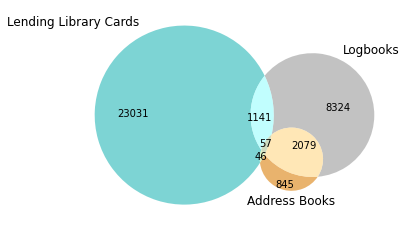

In [ ]:
import matplotlib
from matplotlib_venn import venn3
cards = events_df[events_df['source_type'].str.contains('Lending Library Card')]
logbooks = events_df[events_df['source_type'].str.contains('Logbook')]
addressbook = events_df[events_df['source_type'].str.contains('Address Book')]
print('%d cards' % len(list(cards.index)))
print('%d logbooks' % len(list(logbooks.index)))
print('%d address books' % len(list(addressbook.index)))


# use colors from S&co site design: teal, gray, yellow
venn_plot = venn3([set(cards.index), set(logbooks.index), set(addressbook.index)], ('Lending Library Cards', 'Logbooks', 'Address Books'), set_colors=('#47C2C2', 'darkgray', '#E09330'), alpha=0.7)
#matplotlib.pyplot.savefig('event_source_venn.svg')
venn_plot

1782 cards
11518 logbooks
3027 address books


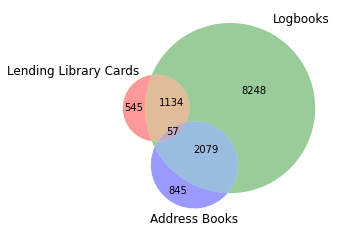

In [ ]:
# generate the same plots for membership activity
membership_events = events_df[events_df.event_type.isin(['Subscription', 'Renewal', 'Supplement', 'Reimbursement'])]

membership_cards = membership_events[membership_events['source_type'].str.contains('Lending Library Card')]
membership_logbooks = membership_events[membership_events['source_type'].str.contains('Logbook')]
membership_addressbook = membership_events[membership_events['source_type'].str.contains('Address Book')]
print('%d cards' % len(list(membership_cards.index)))
print('%d logbooks' % len(list(membership_logbooks.index)))
print('%d address books' % len(list(membership_addressbook.index)))

venn_plot = venn3([set(membership_cards.index), set(membership_logbooks.index), set(membership_addressbook.index)], ('Lending Library Cards', 'Logbooks', 'Address Books'))
# matplotlib.pyplot.savefig('membership_event_source_venn.svg')
venn_plot

22484 cards
0 logbooks
0 address books


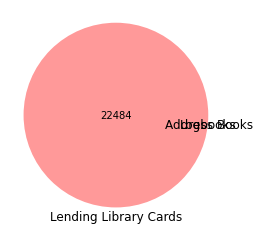

In [ ]:
# generate the same plots for book activity
book_events = events_df[~events_df.item_uri.isna()]

book_cards = book_events[book_events['source_type'].str.contains('Lending Library Card')]
book_logbooks = book_events[book_events['source_type'].str.contains('Logbook')]
book_addressbook = book_events[book_events['source_type'].str.contains('Address Book')]
print('%d cards' % len(list(book_cards.index)))
print('%d logbooks' % len(list(book_logbooks.index)))
print('%d address books' % len(list(book_addressbook.index)))

venn_plot = venn3([set(book_cards.index), set(book_logbooks.index), set(book_addressbook.index)], ('Lending Library Cards', 'Logbooks', 'Address Books'))
#TODO: switch to venn plot 2!

# matplotlib.pyplot.savefig('book_event_source_venn.svg')
venn_plot

## separate payments

(separate deposit in v1.1)

In [ ]:
sep_dep = events_df[events_df.event_type == 'Separate Payment']
sep_dep[['start_date', 'end_date', 'member_uris', 'member_sort_names', 'subscription_price_paid', 'subscription_deposit']]

,start_date,end_date,member_uris,member_sort_names,subscription_price_paid,subscription_deposit
1102,1920-11-18,1920-11-18,https://shakespeareandco.princeton.edu/members...,"Michaelides, Mme L.",8.0,NaN
3496,1923-11-06,1923-11-06,https://shakespeareandco.princeton.edu/members...,"Stafford, Jane",NaN,20.0
3707,1924-01-17,1924-01-17,https://shakespeareandco.princeton.edu/members...,"Embrie, Margaret Train",NaN,20.0
4231,1924-06-25,1924-06-25,https://shakespeareandco.princeton.edu/members...,"Cody, Frances;Cody, Morrill",25.0,NaN
4534,1924-10-08,1924-10-08,https://shakespeareandco.princeton.edu/members...,"Fenner, Mary",NaN,40.0
...,...,...,...,...,...,...
29040,1941-10-10,1941-10-10,https://shakespeareandco.princeton.edu/members...,"Bentz, Mr.",NaN,50.0
29099,1941-10-20,1941-10-20,https://shakespeareandco.princeton.edu/members...,de Girodon,NaN,50.0
29140,1941-10-24,1941-10-24,https://shakespeareandco.princeton.edu/members...,"Simon-Juquin, Mme",NaN,50.0
29273,1941-11-15,1941-11-15,https://shakespeareandco.princeton.edu/members...,"Lange, Mlle",NaN,50.0
